In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Read the survey data from a CSV file
data = pd.read_csv('survey_data.csv')

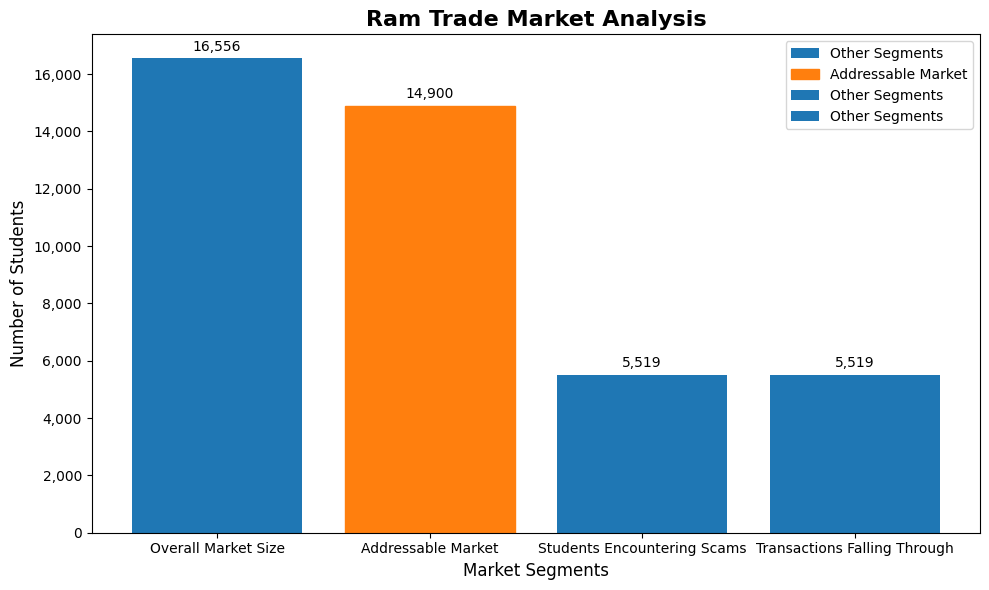

In [54]:
# Adjust column names based on the generated data
data['Used Online Marketplace'] = data['Have you ever used an online marketplace to buy or sell items?'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')
data['Exclusive Marketplace for Fordham Students'] = data['Would you feel more comfortable using an online marketplace exclusively for Fordham students?']

# Calculate the total number of respondents
total_respondents = len(data)

# Calculate the overall market size (assuming the total student population is 16,556)
overall_market_size = 16556

# Calculate the number of students who have used online marketplaces
used_online_marketplaces = len(data[data['Used Online Marketplace'] == 'Yes'])
online_marketplace_adoption_rate = used_online_marketplaces / total_respondents

# Calculate the addressable market size
addressable_market_size = overall_market_size * len(data[data['Exclusive Marketplace for Fordham Students'] == 'Yes']) / total_respondents

# Calculate the number of students encountering scams
encountered_scams = len(data[data['Have you ever encountered any of the following issues while using online marketplaces?'].str.contains('Scams or fraudulent transactions')])
students_encountering_scams = overall_market_size * encountered_scams / total_respondents

# Calculate the number of students experiencing transactions falling through
transactions_falling_through = len(data[data['Have you ever encountered any of the following issues while using online marketplaces?'].str.contains('Transactions falling through due to lack of trust')])
students_transactions_falling_through = overall_market_size * transactions_falling_through / total_respondents

# Create a DataFrame with the calculated data
chart_data = pd.DataFrame({
    'Market Segment': ['Overall Market Size', 'Addressable Market', 'Students Encountering Scams', 'Transactions Falling Through'],
    'Number of Students': [overall_market_size, addressable_market_size, students_encountering_scams, students_transactions_falling_through]
})

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(chart_data['Market Segment'], chart_data['Number of Students'], color=['#1f77b4', '#ff7f0e', '#1f77b4', '#1f77b4'])

# Highlight the addressable market
bars[1].set_color('#ff7f0e')

# Add labels and values to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Customize the chart
ax.set_title('Ram Trade Market Analysis', fontsize=16, fontweight='bold')
ax.set_xlabel('Market Segments', fontsize=12)
ax.set_ylabel('Number of Students', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add a legend
legend_labels = ['Addressable Market' if i == 1 else 'Other Segments' for i in range(len(chart_data))]
ax.legend(bars, legend_labels, loc='upper right', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming it's already been loaded as 'data')
# If not, load it here:
# data = pd.read_csv('/mnt/data/online_marketplace_survey_formatted.csv')

# Adjusting for the actual format in "Features for Trust" which uses brackets and commas
# Removing brackets and splitting by commas
features_data = data["What features would make you trust an online marketplace more?"].str.replace("[", "").str.replace("]", "").str.split(", ", expand=True).stack()

# Reset the index to convert the stacked column into a regular column
features_data = features_data.reset_index(level=1, drop=True)

# Count the frequency of each feature
feature_counts = features_data.value_counts()

# Create a bar chart of the top Features for Trust
plt.figure(figsize=(10, 6))
plt.bar(feature_counts.index, feature_counts.values, color='skyblue')
plt.xlabel("Features for Trust", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top Features for Trust in an Online Marketplace", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print the top 3 Features for Trust
print("Top 3 Features for Trust:")
for i, (feature, count) in enumerate(feature_counts.head(3).items(), start=1):
    print(f"{i}. {feature}: {count}")


KeyError: 'Features for Trust'